# Felipe Veloso Desaf 2

## Ejercicio 1: Preparar el ambiente de trabajo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam.utils import generate_X_grid
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('seaborn')

In [5]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Ejercicio 2: Descripción

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [28]:
df.columns = ['cememt','blast_furnace_slag','fly_ash','water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age','Concrete_compressive_strength']


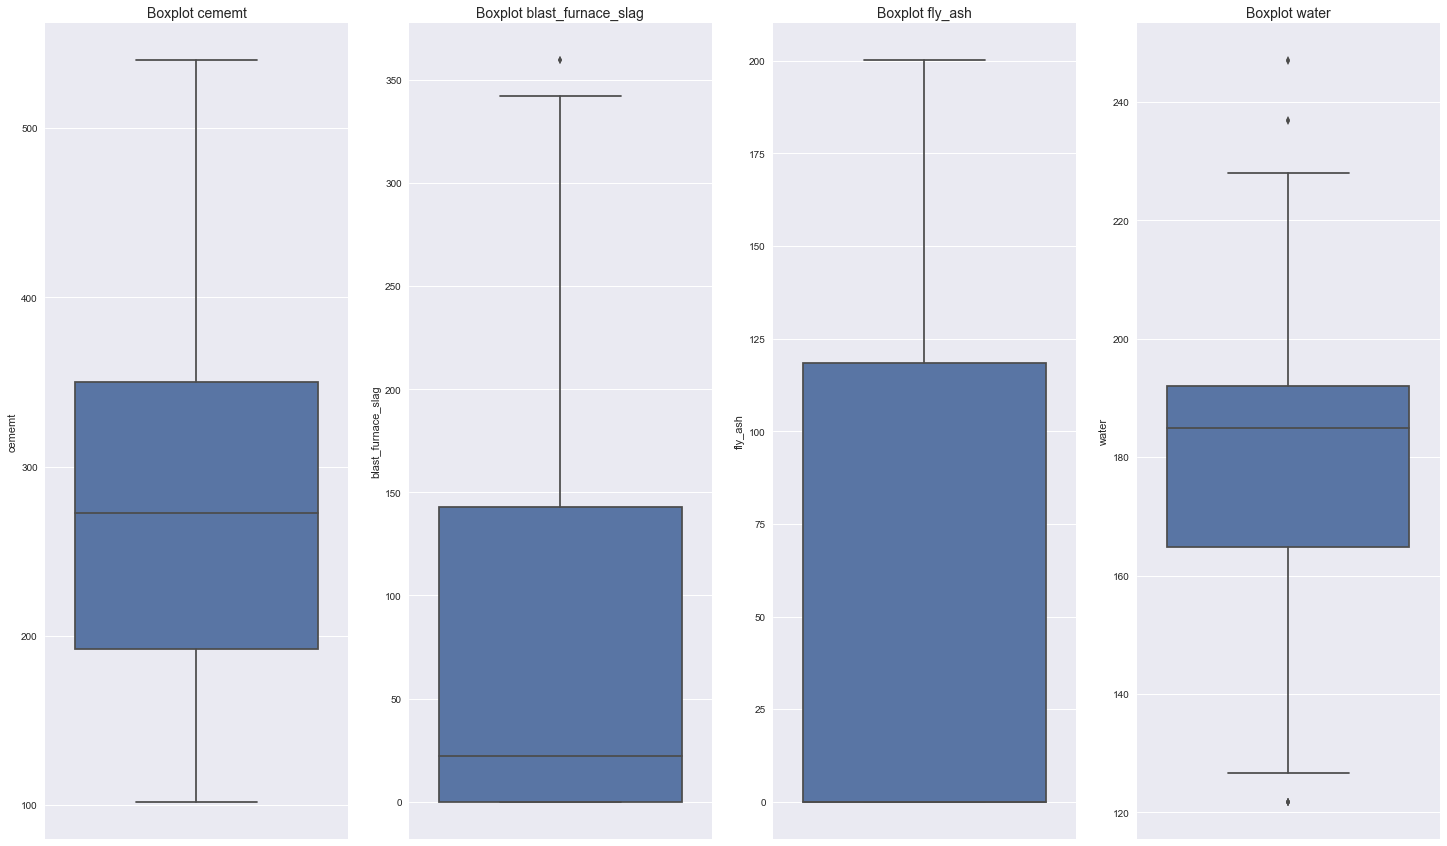

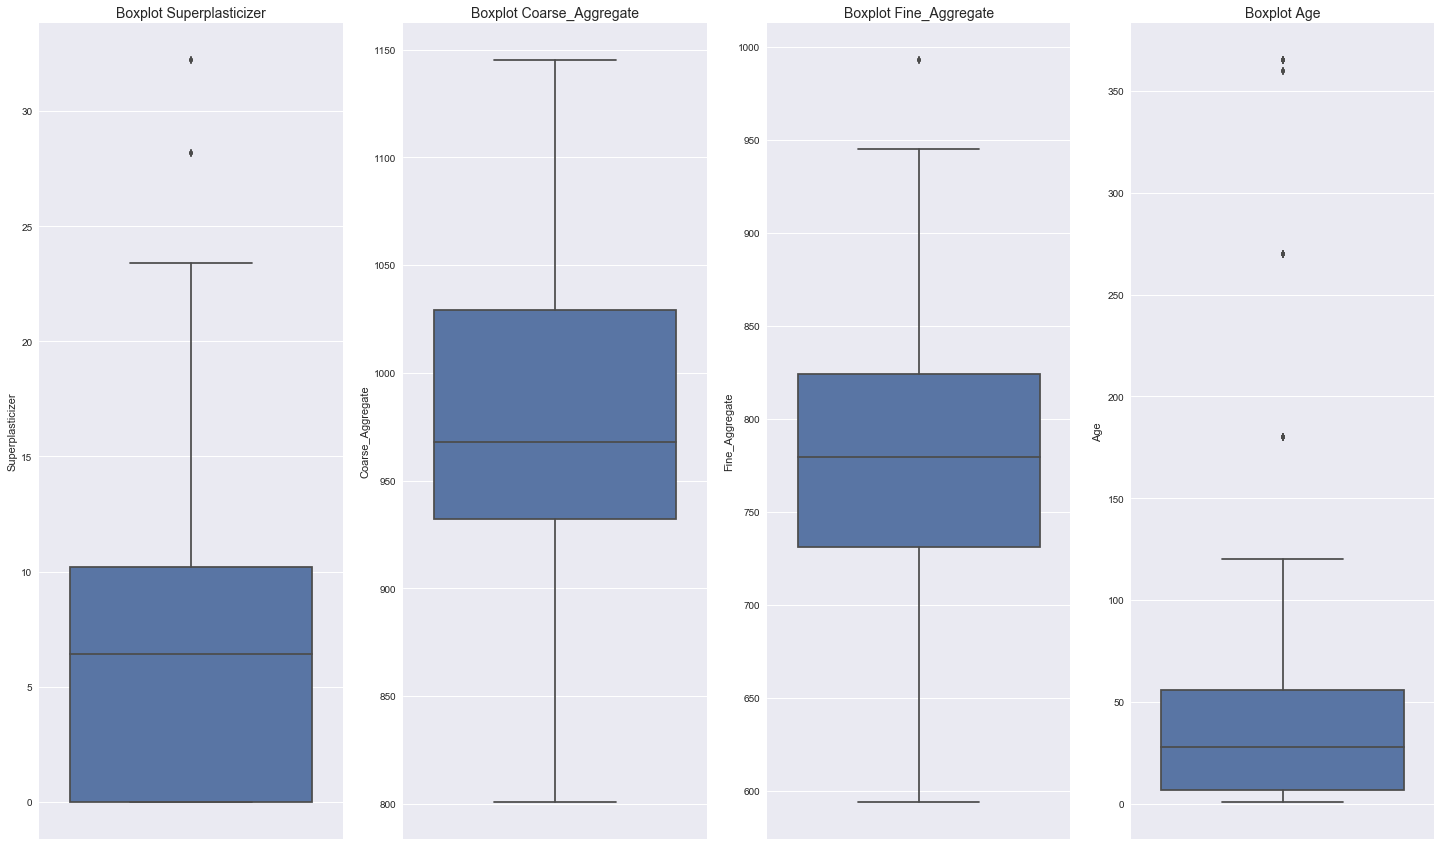

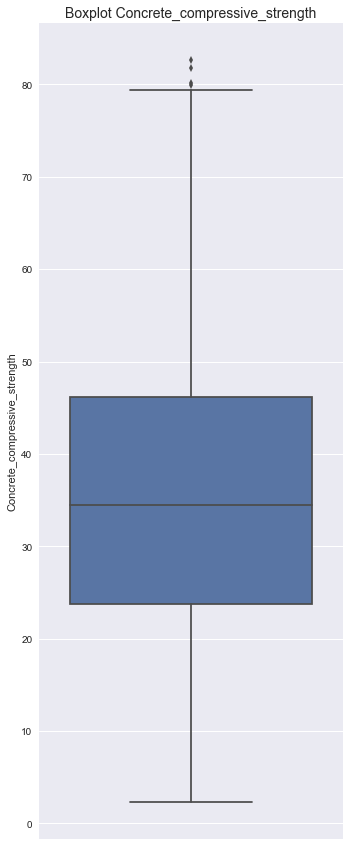

In [132]:
plt.rcParams['figure.figsize'] = (25,15)
i= 0
max_columns=4
columns = df.columns
for col in columns:
   plt.subplot(1, max_columns,(i % max_columns)+1)
   sns.boxplot(x=col,data=df, orient='v').set_title(f'Boxplot {col}',size =14)
   i+=1
   if ((i%max_columns)==0):
       plt.show()
    

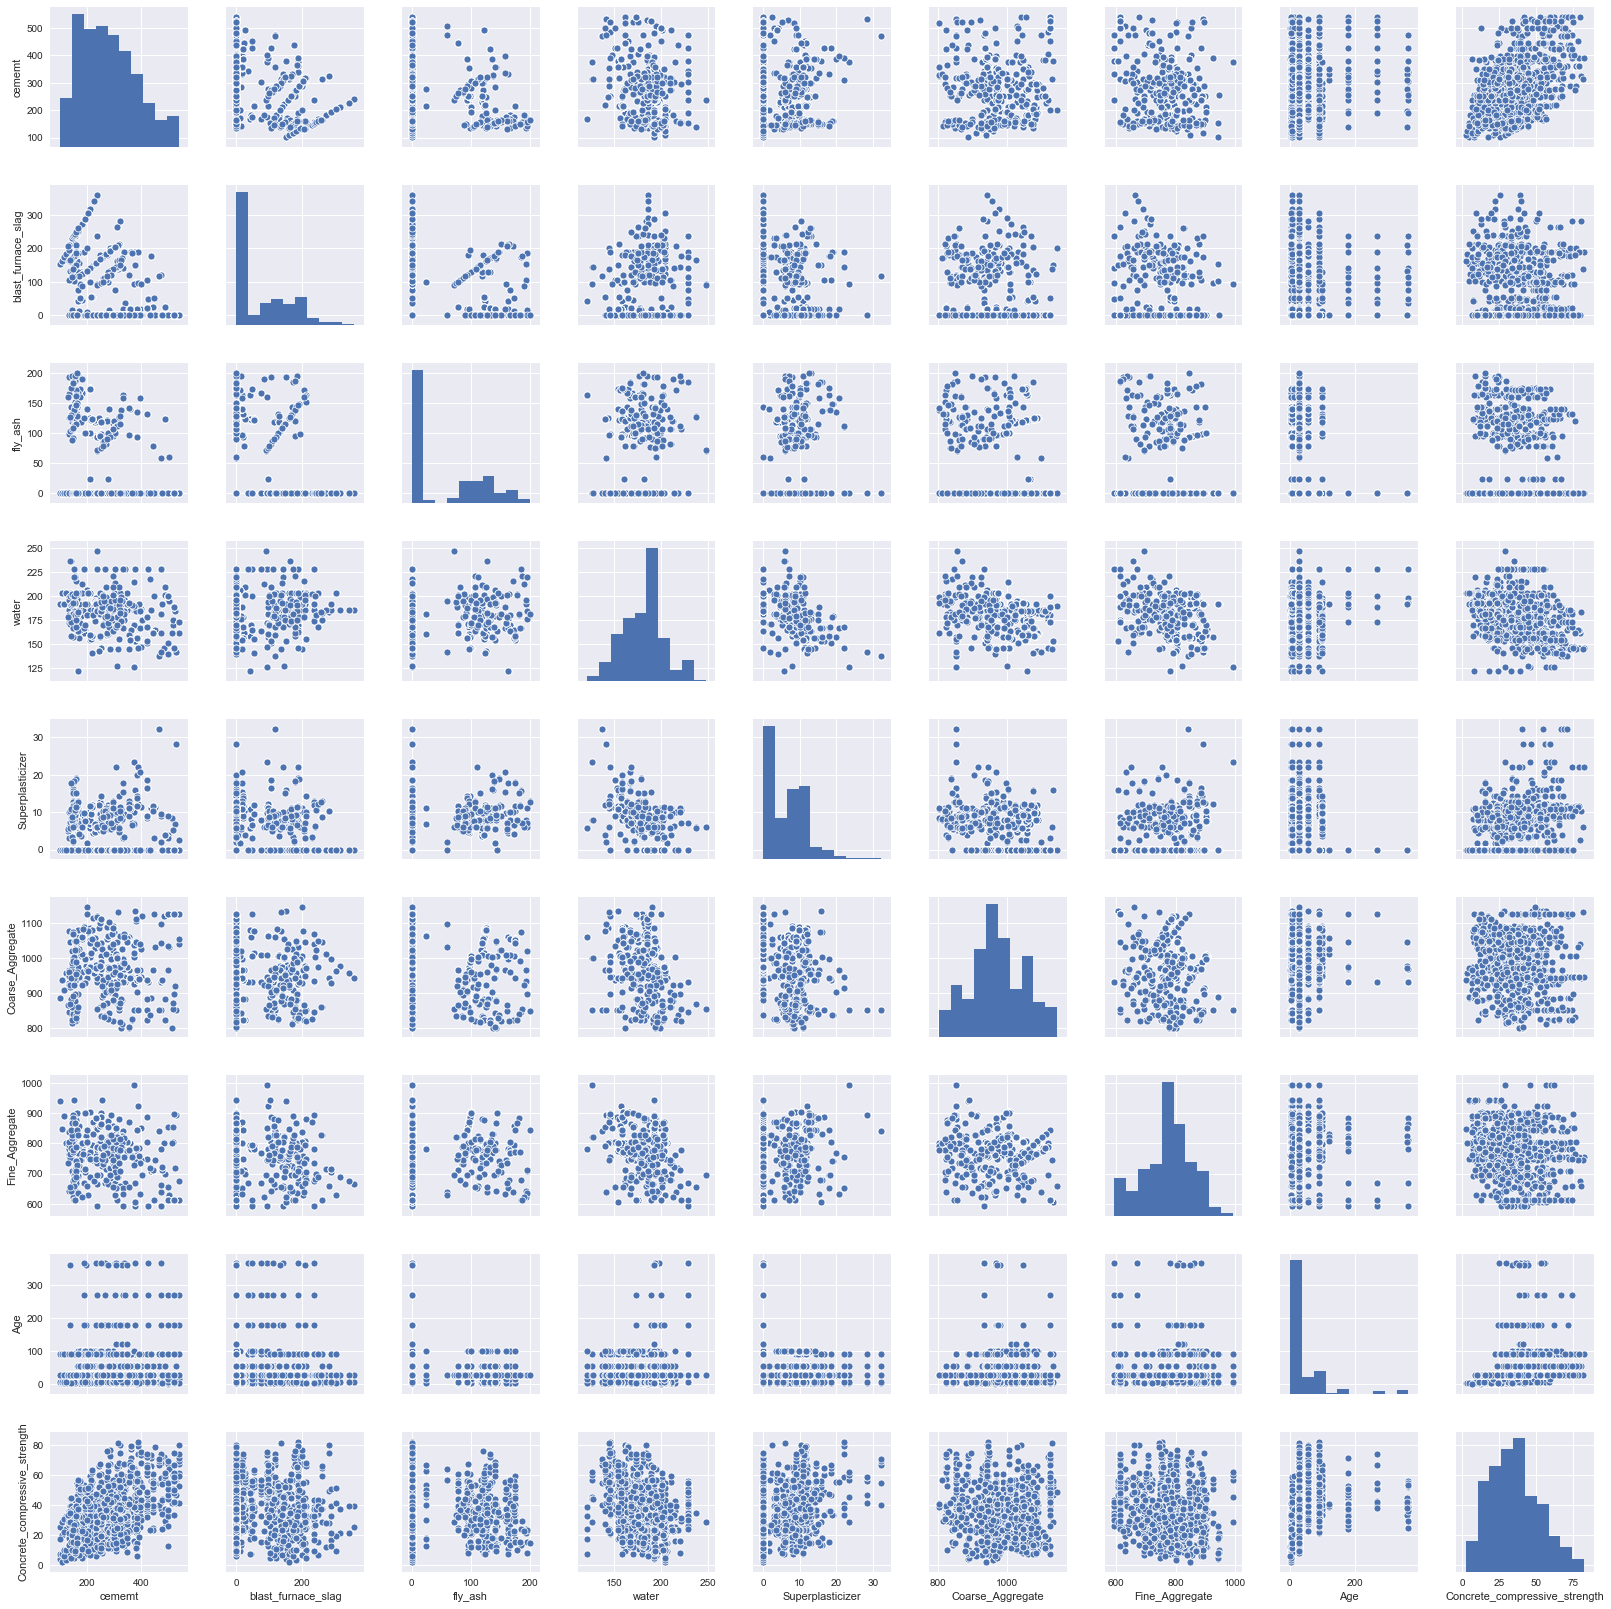

In [30]:
sns.pairplot(df)

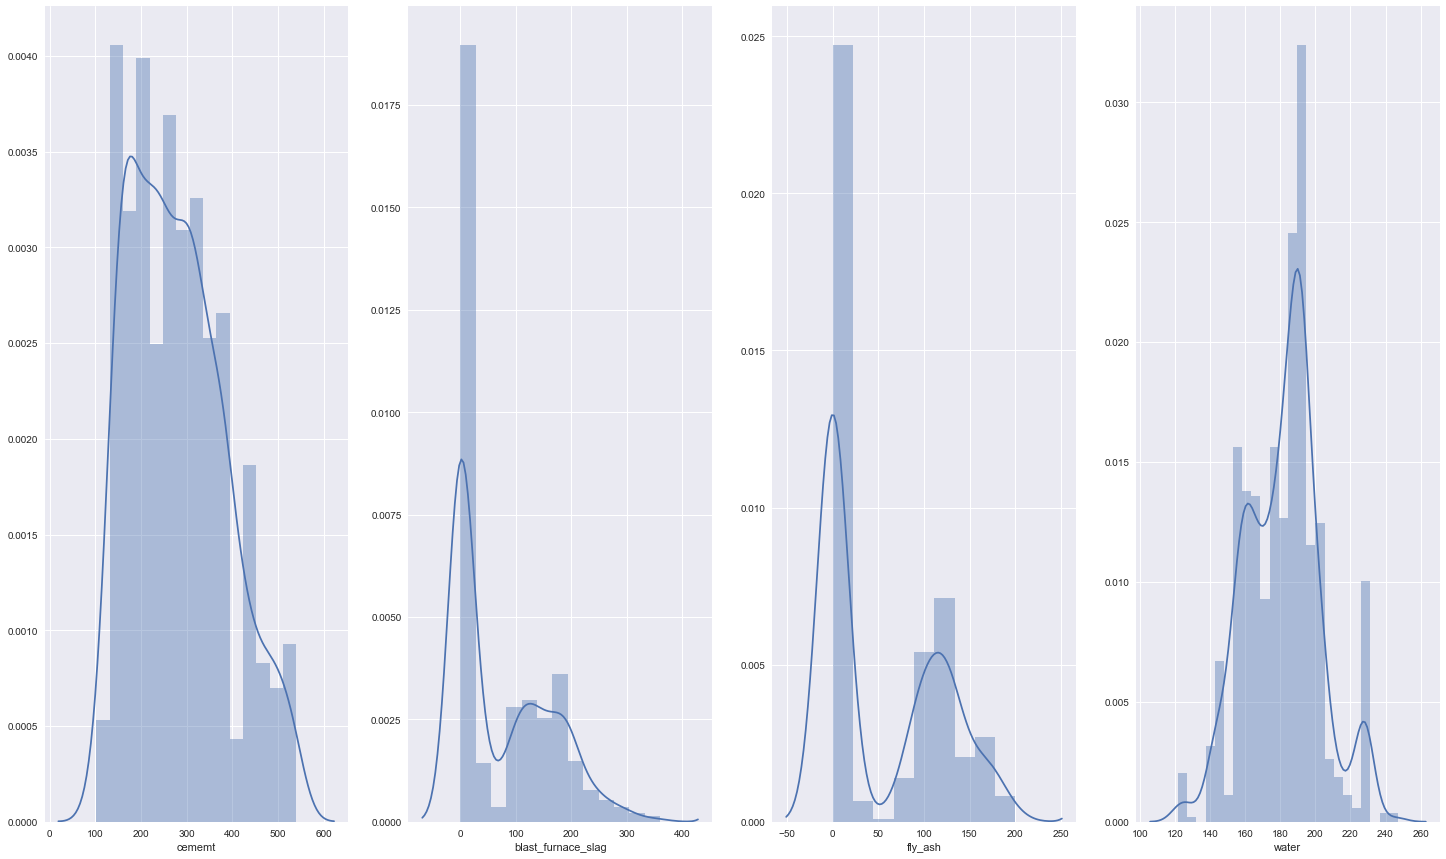

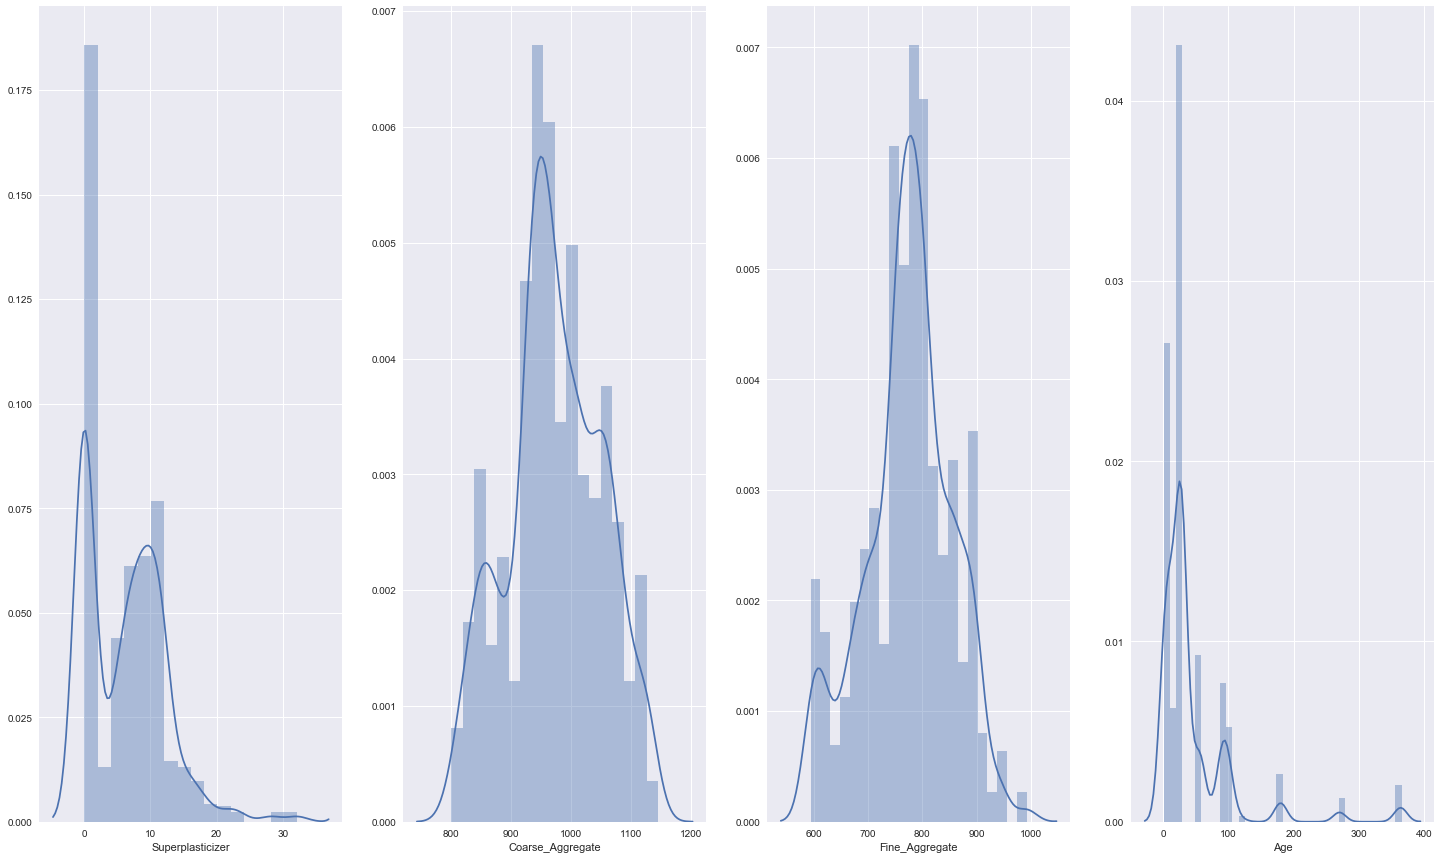

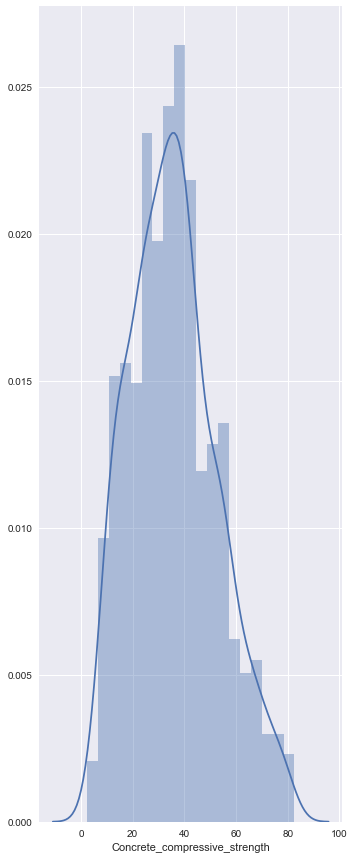

In [138]:
plt.rcParams['figure.figsize'] = (25,15)
i= 0
max_columns=4
columns = df.columns
for col in columns:
   plt.subplot(1, max_columns,(i % max_columns)+1)
   sns.distplot(df[col])
   i+=1
   if ((i%max_columns)==0):
       plt.show()


#for i in df.columns:
#    sns.distplot(df[i])

In [139]:
# se procede a standarizar dado que la data no existe en al misma escala, de esta forma evitamos el castigo por magnitud de las variables

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) #se standarizan columnas
df_scaled['Concrete_compressive_strength'] = np.log(df['Concrete_compressive_strength']) #se aplica logaritmo

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Ejercicio 3: Modelo

In [112]:
from sklearn.model_selection import train_test_split
X = df_scaled.iloc[:,:8]
y = df['Concrete_compressive_strength']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20, random_state=5543)

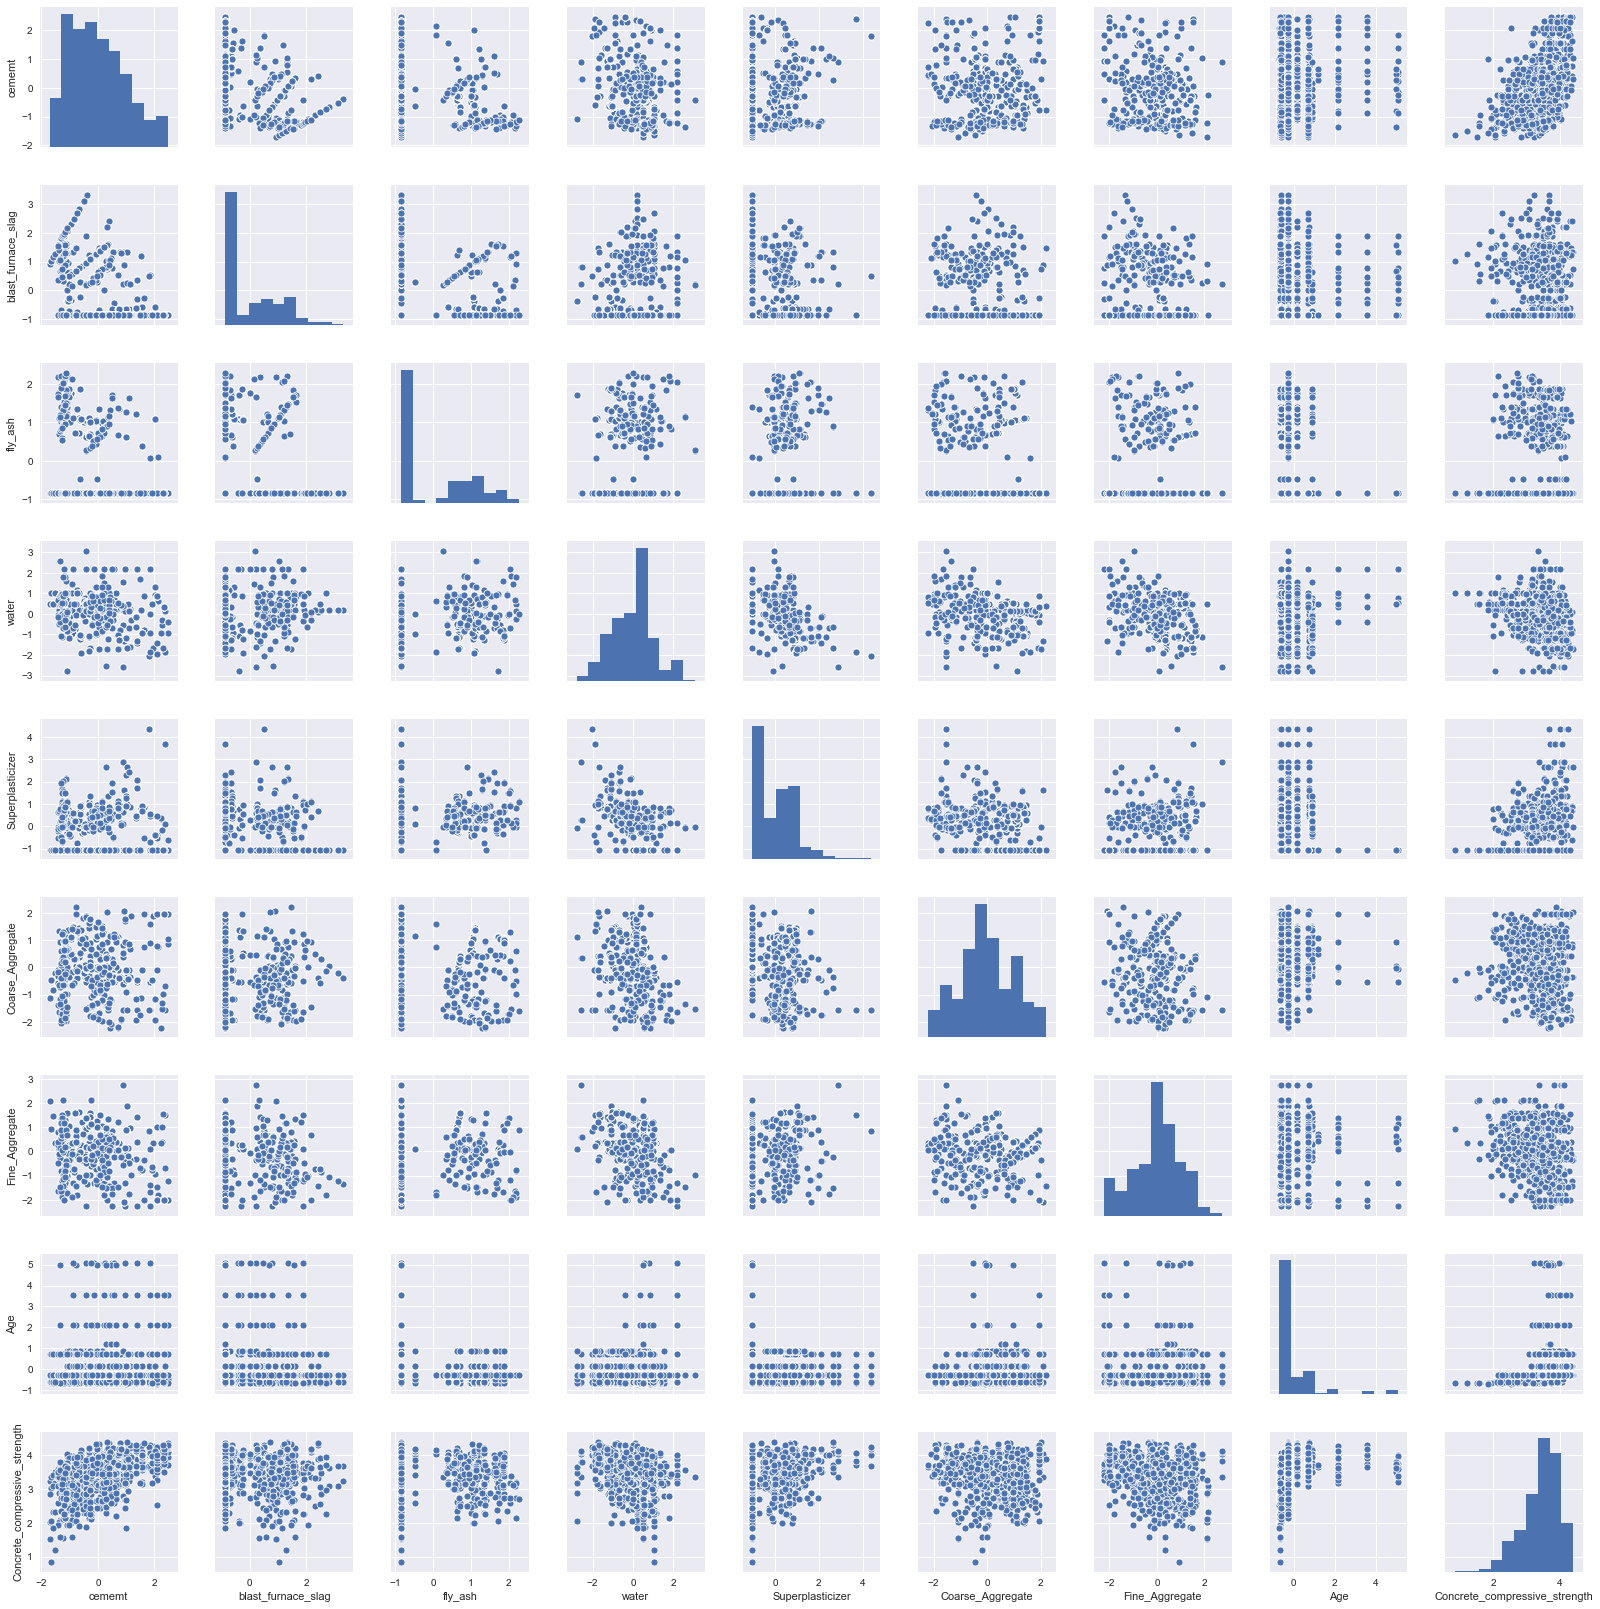

In [113]:
sns.pairplot(df_scaled)

In [140]:
df_scaled['blast_furnace_slag'] = np.log(df['blast_furnace_slag'])
df_scaled['fly_ash'] = np.log(df['fly_ash'])
df_scaled['Superplasticizer'] = np.log(df['Superplasticizer'])
df_scaled['Age'] = np.log(df['Age'])
#al ver sus distribucion, se procede a normalizar, para lograr simular lo mas cercano a una distribucion normal

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
from pygam import LinearGAM

In [116]:
search_params = {'lam': np.logspace(-3,3,11)}

In [117]:
gam = LinearGAM().fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [118]:
gam, gam.lam 

(LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
    dtype='auto', fit_intercept=True, fit_linear=False, 
    fit_splines=True, lam=0.6, max_iter=100, n_splines=25, 
    penalties='auto', scale=None, spline_order=3, tol=0.0001, 
    verbose=False), 0.6)

In [119]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     97.3819
Link Function:                     IdentityLink Log Likelihood:                                 -3406.4423
Number of Samples:                          824 AIC:                                             7009.6483
                                                AICc:                                            7036.6346
                                                GCV:                                               30.9705
                                                Scale:                                             24.4607
                                                Pseudo R-Squared:                                    0.921
Feature Function   Data Type      Num

In [120]:
gamGrid = LinearGAM().gridsearch(X_train,y_train, **search_params)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00/anaconda3/lib/python3.7/site-packa

In [121]:
gamGrid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    109.6346
Link Function:                     IdentityLink Log Likelihood:                                 -3378.3637
Number of Samples:                          824 AIC:                                             6977.9967
                                                AICc:                                            7012.6717
                                                GCV:                                               30.9434
                                                Scale:                                             23.6338
                                                Pseudo R-Squared:                                   0.9249
Feature Function   Data Type      Num

In [122]:
gamGrid.lam 

0.25118864315095796

In [123]:
gamGrid

LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=0.2512, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

In [124]:
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
    model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
    model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
    model.predict(X_test)).round(3)))

In [125]:
report_gam_metrics(gam,X_test,y_test) # r^2 mas alto mejor, 

Test R^2 accuracy: 0.897
Test RMSE accuracy: 5.558
Test MAE accuracy: 3.396


In [126]:
report_gam_metrics(gamGrid,X_test,y_test)

Test R^2 accuracy: 0.895
Test RMSE accuracy: 5.604
Test MAE accuracy: 3.333


In [128]:
from pygam.utils import generate_X_grid

In [143]:
x_grid = generate_X_grid(gam)
attribute = X_train.columns
cols = 8 ; rows = int(len(attribute) / cols)

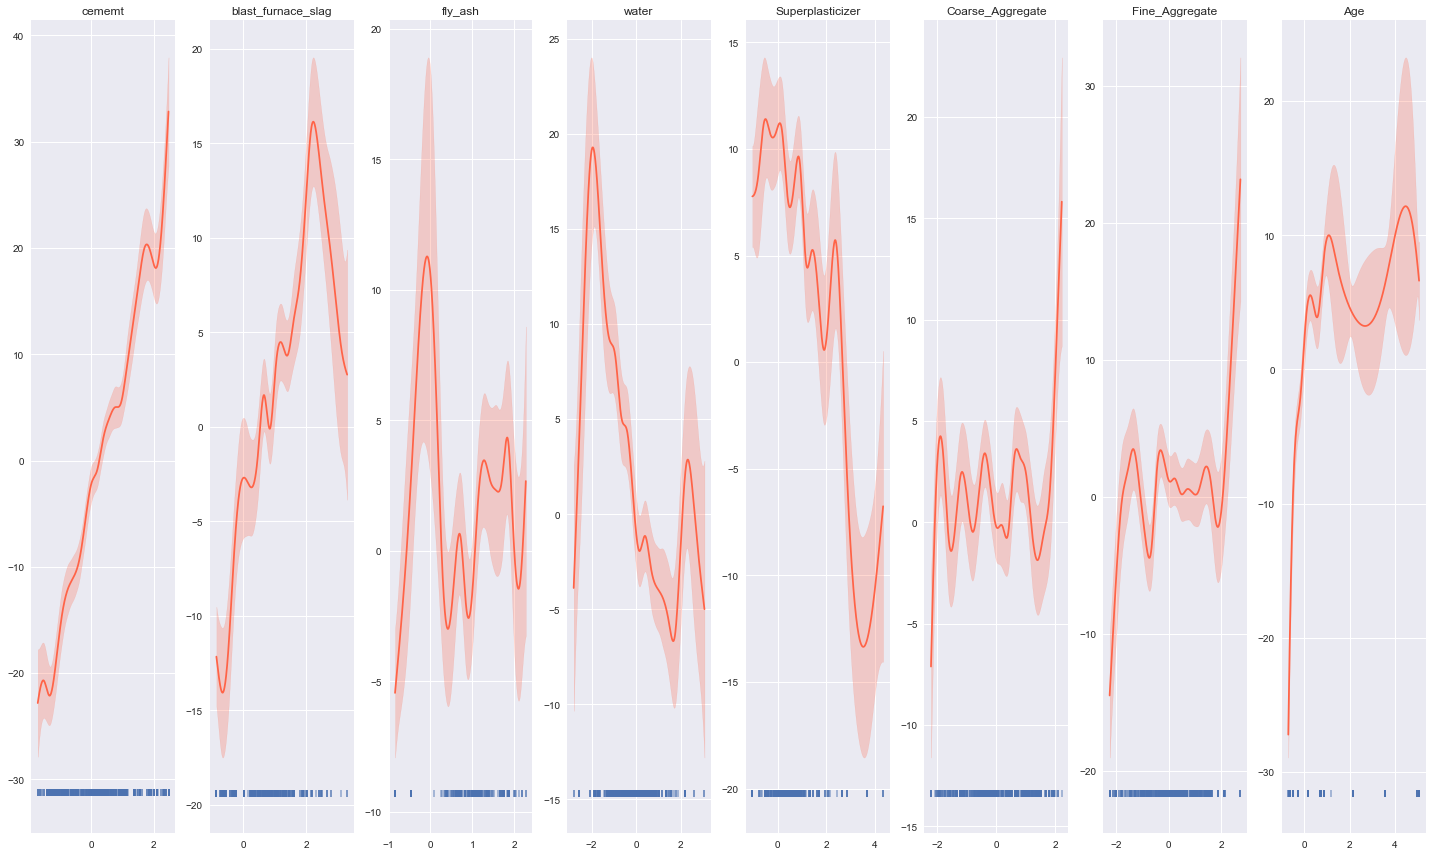

In [144]:
plt.rcParams['figure.figsize'] = (20,12)
x_grid = generate_X_grid(gamGrid)
for i,n in enumerate(range(len(attribute))):
    plt.subplot(rows,cols, i+1)
    partial_dep , confidence_intervals = gamGrid.partial_dependence(x_grid, feature=i +1, width=.95)
    plt.plot(x_grid[:,n], partial_dep, color = 'tomato')
    plt.fill_between(x_grid[:,n], 
                    confidence_intervals[0][:,0],
                    confidence_intervals[0][:,1],
                    color='tomato', alpha=.25)
    plt.title(attribute[n])
    plt.scatter(X_train[attribute[n]],
               [plt.ylim()[0]] * len(X_train[attribute[n]]),
               marker='|', alpha = .5)
    plt.tight_layout()

Se observa una resistenacia en los valores de blast_furnance_slag una gran resistencia en fly_ash, coarse_Aggregate y fine_aggregate, pero para el lambda que estamos trabajando nos presenta el mejor fit y se representa con una funcion cubica.